In [0]:
from fastai.vision import *
from fastai import *
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [3]:
!unzip -qq ./gdrive/My\ Drive/YE358311_Fender_apron.zip

replace YE358311_Fender_apron/YE358311_defects/IMG20180905143750.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
np.random.seed(42)

In [6]:
os.getcwd()

'/content'

In [0]:
np.random.seed(42)
%mkdir data

In [0]:
os.listdir()

['.config', 'data', 'images', 'gdrive', 'crops', 'sample_data']

In [0]:
src = (ImageList.from_folder("./YE358311_Fender_apron/"))

In [0]:
src = src.split_by_rand_pct(0.2)

In [0]:
src = src.label_from_folder()

In [0]:
tfms = get_transforms(flip_vert=True)

In [0]:
src.transform

In [0]:
data = (src.transform(tfms,size=299,resize_method=ResizeMethod.SQUISH).databunch(bs=16).normalize(imagenet_stats))

In [14]:
data.batch_size

16

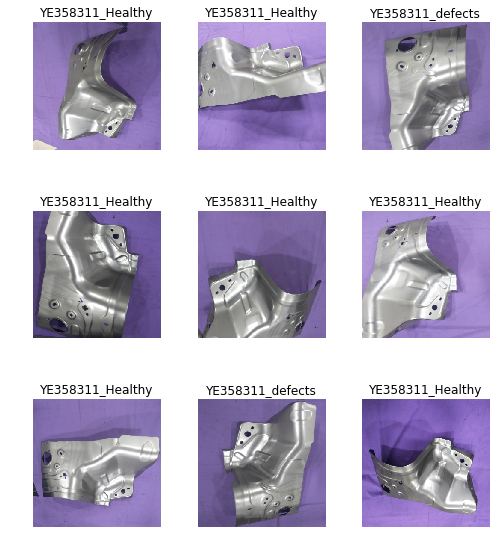

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['YE358311_Healthy', 'YE358311_defects'], 2, 200, 50)

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 48776879.60it/s]


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.864599,0.734726,0.460000,01:19
1,0.702195,0.435998,0.160000,01:16
2,0.649203,0.426930,0.140000,01:22
3,0.645562,0.394784,0.120000,01:45


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


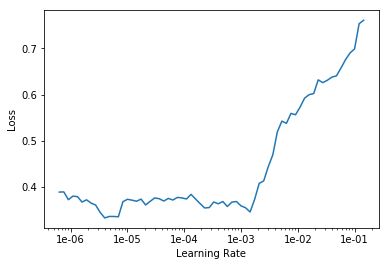

In [27]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4, max_lr=slice(6e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.504193,0.357861,0.160000,01:53
1,0.493186,0.335841,0.140000,02:06
2,0.469738,0.336907,0.120000,01:55
3,0.433701,0.319329,0.120000,01:24


In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [28]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.368113,0.226165,0.100000,01:15
1,0.372204,0.220674,0.100000,01:17


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

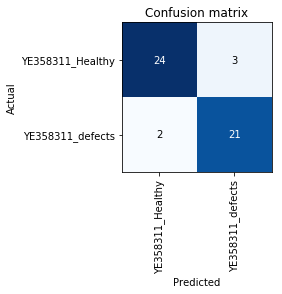

In [31]:
interp.plot_confusion_matrix()

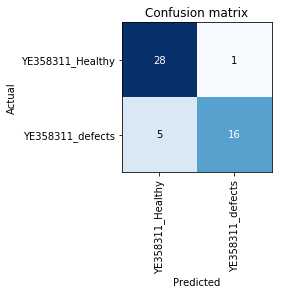

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()